In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/airi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 처리해놓은 데이터 로딩
train_file = "./data/train_2.csv"
test_file = "./data/test_2.csv"

x_train = pd.read_csv(train_file, engine='python')
x_test = pd.read_csv(test_file, engine='python')

In [3]:
y_train = x_train.SalePrice
x_train.drop(['SalePrice'], axis=1, inplace=True)

In [4]:
display(x_train.head())
display(x_test.head())

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.784689,1.214179,-0.112313,0.251255,0.799403,0.799403,1.129973,-0.251374,-0.547956,-0.423910,...,0,0,0,0,1,0,1,1,0,0
1,0.403194,-0.859795,-0.112313,0.251255,0.973570,0.973570,-0.833091,3.880135,-0.132294,-0.423910,...,0,0,0,0,1,0,1,1,0,0
2,-0.569273,1.220996,-0.112313,0.251255,0.610116,0.610116,1.129973,-0.251374,0.167200,-0.423910,...,0,0,0,0,1,0,1,1,0,0
3,-0.437869,1.155241,-0.112313,0.251255,0.234252,0.234252,1.129973,-0.251374,0.329240,2.903308,...,0,0,0,0,1,0,1,1,0,0
4,0.098904,1.318031,-0.112313,1.273273,0.760530,0.760530,1.129973,-0.251374,0.256527,-0.423910,...,0,0,0,0,1,0,1,1,0,0


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,Utilities_None
0,-0.648517,-0.859795,-0.112313,-1.016868,0.591574,0.591574,-0.833091,-0.251374,-0.166720,-0.42391,...,0,0,0,0,1,0,1,1,0,0
1,0.566804,-0.859795,-0.112313,0.251255,0.942008,0.942008,-0.833091,-0.251374,0.118809,-0.42391,...,0,0,0,0,1,0,1,1,0,0
2,-0.543248,1.119259,-0.112313,0.251255,0.859187,0.859187,-0.833091,-0.251374,-0.603727,-0.42391,...,0,0,0,0,1,0,1,1,0,0
3,-0.549736,1.103498,-0.112313,0.251255,0.717310,0.717310,-0.833091,-0.251374,-0.041299,-0.42391,...,0,0,0,0,1,0,1,1,0,0
4,0.447860,-0.859795,-0.112313,-1.016868,0.321268,0.321268,-0.833091,-0.251374,0.830074,-0.42391,...,0,0,0,0,1,0,1,1,0,0


- - -
### log-transformation
 saleprice 정규화를 위한 log-transformation

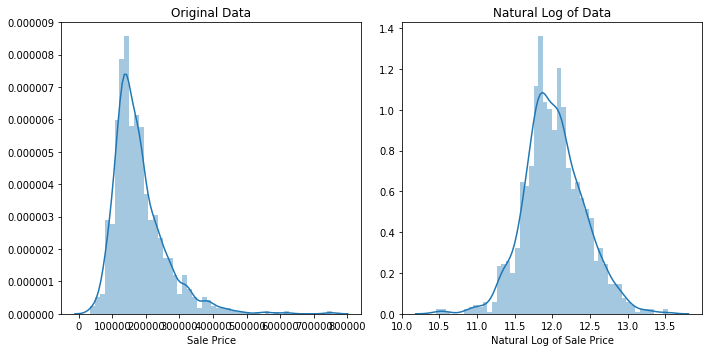

In [5]:
y_train_log = np.log(y_train)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(y_train, bins=50)
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(y_train_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of Sale Price')
plt.tight_layout()

### score 도출해주는 함수 선언

In [6]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

- - -
# data 정리
- - -

In [7]:
# predict_cols = list(predict_cols)
# predict_cols.remove('SalePrice')

- - -
# tensorflow model 정의

In [10]:
import tensorflow as tf

In [11]:
num_unit = 100

In [27]:
x1 = tf.placeholder(tf.float32, [None, x_train.shape[1]])
W1 = tf.Variable(tf.constant(1., shape = [x_train.shape[1], num_unit]))
b1 = tf.Variable(tf.constant(1., shape = [num_unit]))
hidden1 = tf.nn.relu(tf.matmul(x1, W1) + b1)

keep_prob = tf.placeholder(tf.float32)
hidden1_drop = tf.nn.dropout(hidden1, keep_prob)

In [28]:
W0 = tf.Variable(tf.constant(1., shape = [num_unit, 1]))
b0 = tf.Variable(tf.constant(1., shape = [1]))
k = tf.matmul(hidden1_drop, W0) + b0

In [31]:
print (sess.run(y_, feed_dict={y_: y_train}))

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [32]:
y_ = tf.placeholder(tf.float32, [None])
cost = tf.reduce_mean((y_ - k))
train_step = tf.train.AdamOptimizer(0.0001).minimize(cost)

In [33]:
print ("Training\n")
sess = tf.Session()
init = tf.global_variables_initializer() #.run()
sess.run(init)
for _ in range(1000):
    # 1000번씩, 전체 데이타에서 100개씩 뽑아서 트레이닝을 함.  
    sess.run(train_step, feed_dict={x1: x_train, y_: y_train, keep_prob:0.3})
    if _ % 100 == 0 :
        print ('b is ',sess.run(cost, feed_dict={x1: x_train, y_: y_train, keep_prob:0.3}))


Training

b is  176779.73
b is  176702.78
b is  176618.1
b is  176548.98
b is  176464.12
b is  176363.7
b is  176293.8
b is  176206.81
b is  176090.88
b is  175979.9


In [25]:
print ("Testing model")
# Test trained model
print(sess.run(b1, feed_dict={x1: x_train, keep_prob : 0.5}))

Testing model
[0.10187223 0.10206233 0.10190908 0.10208846 0.10201235 0.10217702
 0.10196162 0.10195411 0.10219029 0.10205499 0.10202605 0.1019238
 0.10208867 0.10230825 0.10221057 0.10210691 0.10197137 0.10196734
 0.10212431 0.1021738  0.10187387 0.10203197 0.10188811 0.10187359
 0.1020342  0.10197556 0.10208049 0.10186438 0.10210623 0.10197684
 0.10188925 0.10186858 0.10206302 0.10201637 0.10188034 0.10198873
 0.10191794 0.10204676 0.10215309 0.10207035 0.10190247 0.10177895
 0.1020276  0.1020267  0.10182046 0.10217364 0.10205953 0.1020922
 0.10180949 0.10198287 0.10191715 0.10202885 0.10197583 0.10195958
 0.10184864 0.10184216 0.10190079 0.10182668 0.10195766 0.10185167
 0.10186696 0.10205936 0.10212657 0.10188865 0.10189988 0.10197603
 0.10183423 0.10201858 0.10187656 0.10209247 0.10217207 0.10179152
 0.10197549 0.10187174 0.10184045 0.10206372 0.10208231 0.10208356
 0.10198493 0.10198936 0.10207403 0.1018817  0.10191091 0.10204633
 0.101918   0.10201489 0.10205963 0.10207415 0.101

- - -
# keras를 활용한 DNN 학습

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import metrics
from keras.layers import Dense, Dropout
from sklearn.metrics import make_scorer, mean_squared_error

### data 정의

In [ ]:
from sklearn.model_selection import train_test_split

x_train_np = x_train.as_matrix()
# y_train_np = y_train_log.as_matrix()
x_test_np = x_test.as_matrix()

### model 정의

In [ ]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, input_dim=x_train_np.shape[1], activation='relu'))
    tf.keras.layers.Dropout(0.2)
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [ ]:
model = create_model()

In [ ]:
for _ in range(0,10) :
    X_train, X_test, y_train, y_test = train_test_split(x_train_np, y_train_log, test_size=0.33, random_state=7)
    history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=1000, batch_size=50)

In [ ]:
# 처리해놓은 데이터 로딩
train_file = "./data/train_2.csv"
test_file = "./data/test_2.csv"

x_train = pd.read_csv(train_file, engine='python')
x_test = pd.read_csv(test_file, engine='python')

y_train = x_train.SalePrice
x_train.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
prediction = model.predict(x_test)

y_pred = model.predict(X_test)
display(y_pred.shape)
display(y_test.shape)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()
print(rmsle(y_test,y_pred))

In [ ]:
y_test.shape

In [ ]:
submission = pd.DataFrame()
submission['Id'] = x_test.index+1461
submission['SalePrice'] = np.exp(prediction)
print(submission)

In [ ]:
submission.to_csv('./output_csv/kerasMNN_all_normalize_skewed.csv', index=False)

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)
clf = RandomForestRegressor(n_estimators=1000, n_jobs=-100, max_features=300)

clf.fit(X_train1, y_train1)
y_pred = clf.predict(X_test1)

plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(y_test1,y_pred))

In [ ]:
clf.fit(x_train, y_train_log)

In [ ]:
y_pred = clf.predict(data_test)
y_pred = np.exp(y_pred)
y_pred

In [ ]:
my_submission = pd.DataFrame({'Id': data_test.index+2, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('randomforest_all_normalize_skewed.csv', index=False)

In [ ]:
data_train.head()

In [ ]:
import xgboost as xgb

X_train1, X_test1, y_train1, y_test1 = train_test_split(x_train, y_train_log)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=2, 
                             min_child_weight=1.7817, n_estimators=1500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_xgb.fit(X_train1, y_train1)
y_pred = model_xgb.predict(X_test1)

# y_pred = np.exp(y_pred)


plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)])
plt.tight_layout()
print(rmsle(y_test1,y_pred))

In [ ]:
x_test.shape

In [ ]:
model_xgb.fit(x_train, y_train_log)
y_pred = model_xgb.predict(x_test)
y_pred = np.exp(y_pred)
print(y_pred)
my_submission = pd.DataFrame({'Id': x_test.index+1461, 'SalePrice': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('./output_csv/xgb_all_normalize_skewed.csv', index=False)

In [ ]:
import tensorflow as tf
from sklearn.cross_validation import train_test_split

In [ ]:
COLUMNS = data_train.keys()
COLUMNS = COLUMNS.drop('Exterior1st_Wd Sdng')
COLUMNS = COLUMNS.drop('Exterior2nd_Brk Cmn')
COLUMNS = COLUMNS.drop('Exterior2nd_Wd Sdng')
COLUMNS = COLUMNS.drop('Exterior2nd_Wd Shng')
COLUMNS = COLUMNS.drop('MSZoning_C (all)')
COLUMNS = COLUMNS.drop('RoofMatl_Tar&Grv')


FEATURES = data_train.keys()
FEATURES = FEATURES.drop('Exterior1st_Wd Sdng')
FEATURES = FEATURES.drop('Exterior2nd_Brk Cmn')
FEATURES = FEATURES.drop('Exterior2nd_Wd Sdng')
FEATURES = FEATURES.drop('Exterior2nd_Wd Shng')
FEATURES = FEATURES.drop('MSZoning_C (all)')
FEATURES = FEATURES.drop('RoofMatl_Tar&Grv')

#COLUMNS = COLUMNS.drop('')
#FEATURES = FEATURES.drop('')



LABEL = "SalePrice"


In [ ]:
# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and Prediction set with the features to predict
training_set = data_train[COLUMNS]
prediction_set = data_train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# # Training for submission
# training_sub = training_set[col_train]

In [ ]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()
y_test.head()

In [ ]:
# Model
tf.logging.set_verbosity(tf.logging.ERROR)
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])#,
                                         #optimizer = tf.train.GradientDescentOptimizer( learning_rate= 0.1 ))

In [ ]:
# Reset the index of training
training_set.reset_index(drop = True, inplace =True)

In [ ]:
def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
        return feature_cols

In [ ]:
# Deep Neural Network Regressor with the training set which contain the data split by train test split
regressor.fit(input_fn=lambda: input_fn(data_train), steps=2000)

In [ ]:
# Evaluation on the test set created by train_test_split
ev = regressor.evaluate(input_fn=lambda: input_fn(data_test), steps=1)

In [ ]:
# Display the score on the testing set
# 0.002X in average
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1))

In [ ]:
import itertools
# Predictions
y = regressor.predict(input_fn=lambda: input_fn(data_test))
predictions = list(itertools.islice(y, data_test.shape[0]))
predictions[0]

In [ ]:
my_submission = pd.DataFrame({'Id': data_test.index+2, 'SalePrice': predictions})
# you could use any filename. We choose submission here
my_submission.to_csv('tensor_all_normalize_skewed.csv', index=False)